In [1]:
import sys, traceback
import cv2
import os
import re
import numpy as np
import argparse
import string
LIBRARY_PATH = '/home/iizuka/workspace/py2/lib'
PLANTCV_PATH = '/home/iizuka/workspace/py2/lib/plantcv'
sys.path.append(LIBRARY_PATH)
sys.path.append(PLANTCV_PATH)
import plantcv as pcv


In [2]:
class Args():
    def __init__(self, **kwargs):
        self.image = kwargs['image']
        self.outdir = kwargs['outdir']
        self.names = kwargs['names']
        self.debug = kwargs['debug']

IMG_DATABASE_PATH = '/home/iizuka/workspace/py2/input_imgs'
img_file = IMG_DATABASE_PATH + '/1511513007.jpg'
out_dir = '/home/iizuka/workspace/py2/generated_imgs/plantcv'

kwargs = {
    'image':img_file,
    'outdir':out_dir,
    'names':'',
    'debug':'plot'
    
}

In [3]:
### Main pipeline
# Get options
args = Args(**kwargs)
# Read image
img, path, filename = pcv.readimage(args.image)

debug=args.debug 

# Pipeline step
device = 0

In [4]:
if np.average(img) < 50:
    pcv.fatal_error("Night Image")
else:
    pass

In [5]:
device,img1=pcv.white_balance(device,img,debug,roi=(50,0,1000,600))

In [8]:
type(img1)
img1.shape

(720, 1280, 3)

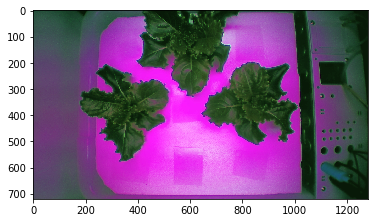

In [6]:
device, rotate_img = pcv.rotate_img(img1, 0, device, debug)

In [90]:
#device, shift1 = pcv.shift_img(img1, device, 20, 'top', debug)
#img1 = shift1

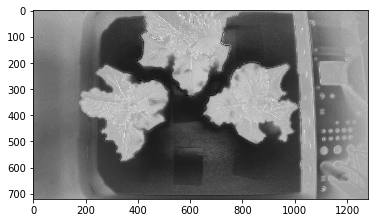

In [101]:
device, a = pcv.rgb2gray_lab(img1, 'b', device, debug)

In [81]:
mask = np.copy(img_binary)

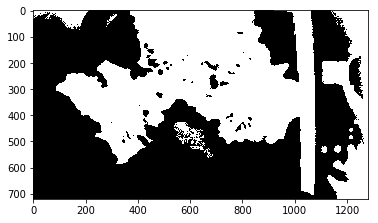

In [82]:
device, fill_image = pcv.fill(img_binary, mask, 130, device, debug)


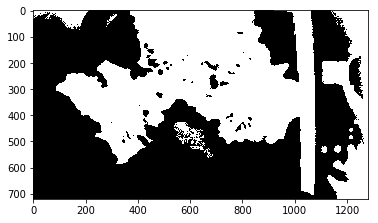

In [83]:
# STEP 8: Dilate so that you don't lose leaves (just in case)
# Inputs:
#    img     = input image
#    kernel  = integer
#    i       = interations, i.e. number of consecutive filtering passes
#    device  = device number. Used to count steps in the pipeline
#    debug   = None, print, or plot. Print = save to file, Plot = print to screen.

device, dilated = pcv.dilate(fill_image, 1, 1, device, debug)

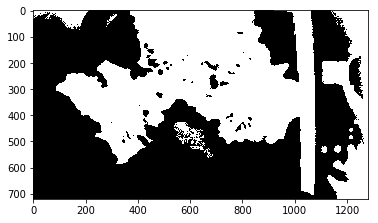

In [84]:
# STEP 8: Dilate so that you don't lose leaves (just in case)
# Inputs:
#    img     = input image
#    kernel  = integer
#    i       = interations, i.e. number of consecutive filtering passes
#    device  = device number. Used to count steps in the pipeline
#    debug   = None, print, or plot. Print = save to file, Plot = print to screen.

device, dilated = pcv.dilate(fill_image, 1, 1, device, debug)

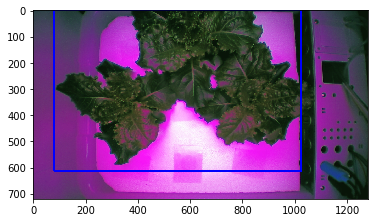

In [89]:
# STEP 10: Define region of interest (ROI)
# Inputs:
#    img       = img to overlay roi
#    roi       = default (None) or user input ROI image, object area should be white and background should be black,
#                has not been optimized for more than one ROI
#    roi_input = type of file roi_base is, either 'binary', 'rgb', or 'default' (no ROI inputted)
#    shape     = desired shape of final roi, either 'rectangle' or 'circle', if  user inputs rectangular roi but chooses
#                'circle' for shape then a circle is fitted around rectangular roi (and vice versa)
#    device    = device number.  Used to count steps in the pipeline
#    debug     = None, print, or plot. Print = save to file, Plot = print to screen.
#    adjust    = either 'True' or 'False', if 'True' allows user to adjust ROI
#    x_adj     = adjust center along x axis
#    y_adj     = adjust center along y axis
#    w_adj     = adjust width
#    h_adj     = adjust height
device, roi, roi_hierarchy = pcv.define_roi(img1, 'rectangle', device, None, 'default', debug, True, 
                                             80, 0, -250, -100)

In [67]:
# STEP 11: Keep objects that overlap with the ROI
# Inputs:
#    img            = img to display kept objects
#    roi_type       = 'cutto' or 'partial' (for partially inside)
#    roi_contour    = contour of roi, output from "View and Ajust ROI" function
#    roi_hierarchy  = contour of roi, output from "View and Ajust ROI" function
#    object_contour = contours of objects, output from "Identifying Objects" fuction
#    obj_hierarchy  = hierarchy of objects, output from "Identifying Objects" fuction
#    device         = device number.  Used to count steps in the pipeline
#    debug          = None, print, or plot. Print = save to file, Plot = print to screen.
device, roi_objects, roi_obj_hierarchy, kept_mask, obj_area = pcv.roi_objects(img1, 'partial', roi, roi_hierarchy,
                                                                           id_objects, obj_hierarchy, device,
                                                                           debug)

NameError: name 'id_objects' is not defined